In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
rv = pd.read_csv(r"E:\Imarticisans\Time series dataset\RestaurantVisitors.csv" , index_col= 'date' , parse_dates = True)

In [4]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [6]:
rv.shape

(517, 8)

In [7]:
rv = rv.dropna()

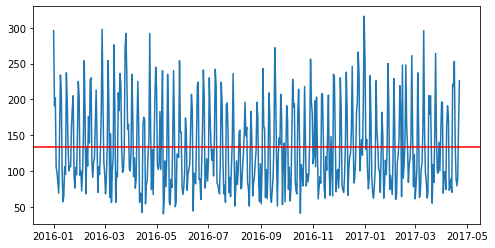

In [10]:
plt.figure( figsize= ( 8,4))
plt.plot( rv.total) # from this graph we can say that there is no uptrend and downtrend and date is stationary.
plt.axhline( y =  rv.total.mean() , color = "r"  )

In [11]:
rv.total.mean() # just for referance . 

133.7928870292887

In [15]:
rv[ rv['holiday']== 1].index   # we will to get the index positions of all the holidays. 

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

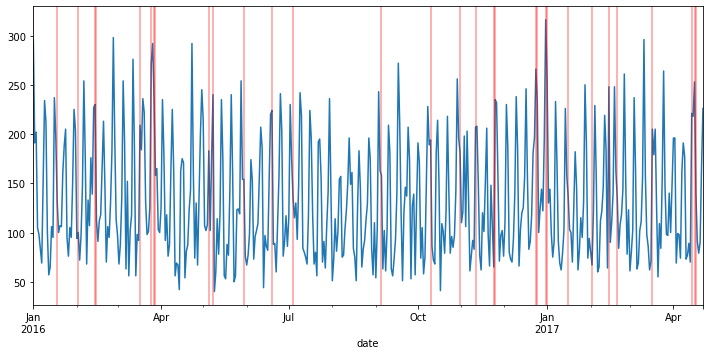

In [16]:
index_pos = rv[ rv['holiday']==1].index   # all the holidays. 
ax = rv['total'].plot( figsize = (12,5.5))
for days in index_pos:
    ax.axvline( x = days , color = "r" , alpha =0.4) 
    
    # At every red line showing holidays , it is observed that there is a pick at each every holidays .
    # Hence , we need to handle the holidays seperately using SARIMAX. 

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

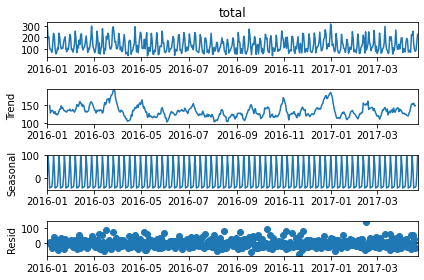

In [19]:
rv_seasonal = seasonal_decompose( rv['total'])
rv_seasonal.plot();

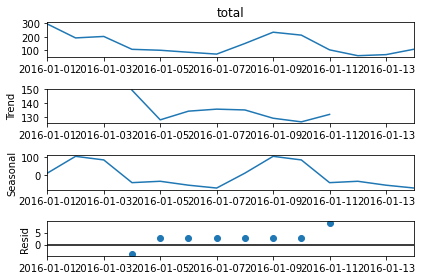

In [20]:
rv_seasonal = seasonal_decompose(rv.total[0:14])
rv_seasonal.plot();               # For better explnation plotted 1st 14 rcords , that it has seasonality. 

In [21]:
train_rv = rv.iloc[0 : 450]
test_rv  = rv.iloc[450 : 478]  # data has splited into train and test , using sequential sampling.

In [23]:
auto_arima( rv['total'] , seasonal = True , m= 7)  

# output of Auto_ARIMA , acts as a input to SARIMAX. 

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [24]:
model_rv = SARIMAX( train_rv['total'], order = (1, 0 , 0) , seasonal_order=( 1 , 0, 1, 7) )
result_rv = model_rv.fit() # Model has build 

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [25]:
pred_rv = result_rv.predict( start = 450 , end = 477)
pred_rv

2017-03-26    180.795817
2017-03-27     91.785128
2017-03-28     95.813346
2017-03-29     95.445185
2017-03-30     96.925812
2017-03-31    145.254155
2017-04-01    232.331304
2017-04-02    174.636170
2017-04-03     90.584548
2017-04-04     95.573998
2017-04-05     95.392577
2017-04-06     96.909341
2017-04-07    145.240868
2017-04-08    232.312435
2017-04-09    174.622171
2017-04-10     90.577307
2017-04-11     95.566369
2017-04-12     95.384965
2017-04-13     96.901608
2017-04-14    145.229278
2017-04-15    232.293897
2017-04-16    174.608236
2017-04-17     90.570079
2017-04-18     95.558743
2017-04-19     95.377353
2017-04-20     96.893875
2017-04-21    145.217689
2017-04-22    232.275361
Freq: D, Name: predicted_mean, dtype: float64

In [26]:
test_rv[test_rv['holiday'] == 1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

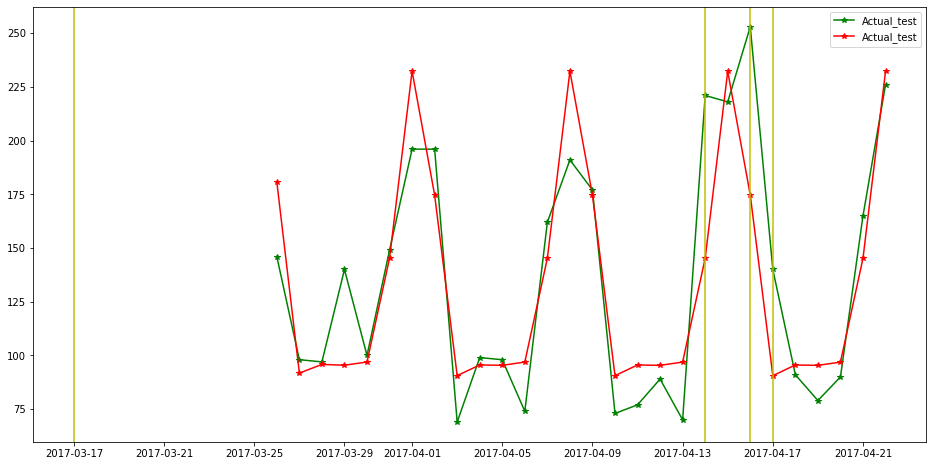

In [27]:
# Graph ploted using SARIMA only, it is seen that on holidays actual values are higher than the predicted ones.  

plt.figure( figsize=( 16 , 8))
plt.plot( test_rv.total , marker ="*" , color="g" , label ='Actual_test')
plt.plot( pred_rv , marker ="*" , color="r" , label ='Actual_test')           
plt.axvline( x = '2017-03-17' , color = 'y')
plt.axvline( x = '2017-04-14' , color = 'y')
plt.axvline( x = '2017-04-16' , color = 'y')           
plt.axvline( x = '2017-04-17' , color = 'y')     
plt.legend()


In [28]:
mse = np.mean( np.square( test_rv.total - pred_rv))
print(mse)
RMSE = np.sqrt(np.mean( np.square( test_rv.total - pred_rv)))
print(RMSE)

884.2058432740263
29.7355989224032


# Ploting the Grap using SARIMAX , where X stand for exogenous variable ( which can handle the external effect) . 

In [29]:
auto_arima( rv['total'] , seasonal = True , m= 7 , exogenous = rv[['holiday']])

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(2, 0, 0, 7),
      suppress_warnings=True)

In [30]:
model_rv = SARIMAX( train_rv['total'], order = (0 , 0 , 1) , seasonal_order= (2, 0, 0, 7)  , exog = train_rv[['holiday']] )
result_rv1= model_rv.fit() # Model has build

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
pred_rv_exog= result_rv1.predict( start = 450 , end = 477 , exog = test_rv[['holiday']]  )
pred_rv_exog

2017-03-26    183.579697
2017-03-27    109.030071
2017-03-28     68.302133
2017-03-29     83.954009
2017-03-30     75.706917
2017-03-31    141.748975
2017-04-01    217.008418
2017-04-02    189.079893
2017-04-03    113.836618
2017-04-04     60.263854
2017-04-05     93.699248
2017-04-06     77.718917
2017-04-07    143.962800
2017-04-08    233.784025
2017-04-09    181.677933
2017-04-10    108.671406
2017-04-11     62.546634
2017-04-12     86.703271
2017-04-13     74.794381
2017-04-14    207.867496
2017-04-15    219.902991
2017-04-16    249.185040
2017-04-17    176.969278
2017-04-18     59.878439
2017-04-19     87.821500
2017-04-20     74.284354
2017-04-21    137.959852
2017-04-22    220.907881
Freq: D, Name: predicted_mean, dtype: float64

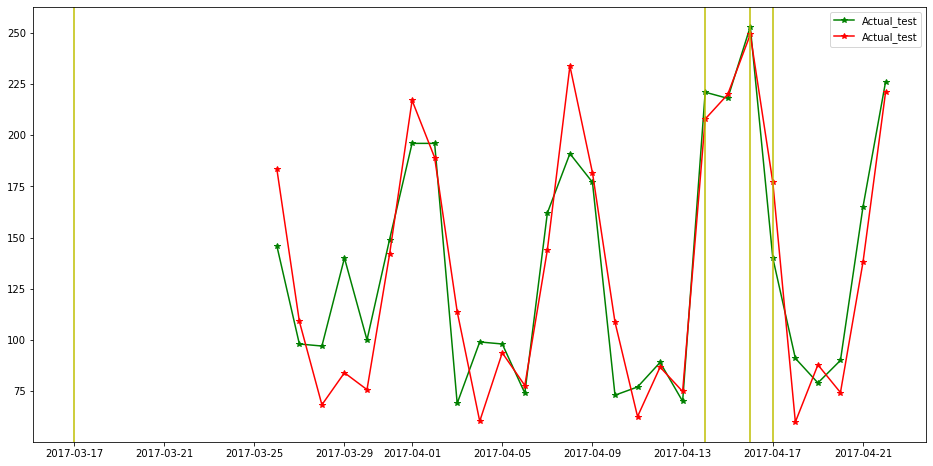

In [32]:
#  Graph ploted usin SARIMA - X. Here, values at holidays seems predicted some what close to actual one's . 

plt.figure( figsize=( 16 , 8))
plt.plot( test_rv.total , marker ="*" , color="g" , label ='Actual_test')
plt.plot( pred_rv_exog , marker ="*" , color="r" , label ='Actual_test')           
plt.axvline( x = '2017-03-17' , color = 'y')
plt.axvline( x = '2017-04-14' , color = 'y')
plt.axvline( x = '2017-04-16' , color = 'y')           
plt.axvline( x = '2017-04-17' , color = 'y')     
plt.legend()


In [34]:
mse_exog = np.mean( np.square( test_rv.total - pred_rv_exog))
mse_exog

623.8875275877439

In [33]:
RMSE_EXOG = np.sqrt(np.mean( np.square( test_rv.total - pred_rv_exog)))
RMSE_EXOG

24.977740642174663

In [35]:
pred_rv_exog

2017-03-26    183.579697
2017-03-27    109.030071
2017-03-28     68.302133
2017-03-29     83.954009
2017-03-30     75.706917
2017-03-31    141.748975
2017-04-01    217.008418
2017-04-02    189.079893
2017-04-03    113.836618
2017-04-04     60.263854
2017-04-05     93.699248
2017-04-06     77.718917
2017-04-07    143.962800
2017-04-08    233.784025
2017-04-09    181.677933
2017-04-10    108.671406
2017-04-11     62.546634
2017-04-12     86.703271
2017-04-13     74.794381
2017-04-14    207.867496
2017-04-15    219.902991
2017-04-16    249.185040
2017-04-17    176.969278
2017-04-18     59.878439
2017-04-19     87.821500
2017-04-20     74.284354
2017-04-21    137.959852
2017-04-22    220.907881
Freq: D, Name: predicted_mean, dtype: float64

In [36]:
pred_rv

2017-03-26    180.795817
2017-03-27     91.785128
2017-03-28     95.813346
2017-03-29     95.445185
2017-03-30     96.925812
2017-03-31    145.254155
2017-04-01    232.331304
2017-04-02    174.636170
2017-04-03     90.584548
2017-04-04     95.573998
2017-04-05     95.392577
2017-04-06     96.909341
2017-04-07    145.240868
2017-04-08    232.312435
2017-04-09    174.622171
2017-04-10     90.577307
2017-04-11     95.566369
2017-04-12     95.384965
2017-04-13     96.901608
2017-04-14    145.229278
2017-04-15    232.293897
2017-04-16    174.608236
2017-04-17     90.570079
2017-04-18     95.558743
2017-04-19     95.377353
2017-04-20     96.893875
2017-04-21    145.217689
2017-04-22    232.275361
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
#                        Actual value                Predict with_ - X               Predict without - X

2017 - 14                  221.0                         207.867496                    145.229278
2017 - 16                  253.0                         249.185040                    174.608236
2017 - 17                  140.0                         176.969278                    90.570079

# It is observed that with X values has improved, look at the column prediction with X . 